In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore

In [2]:
df=pd.read_csv("E:\\Advertising.csv")
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data_mod=df.drop('Unnamed: 0',axis=1)

In [6]:
data_mod.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


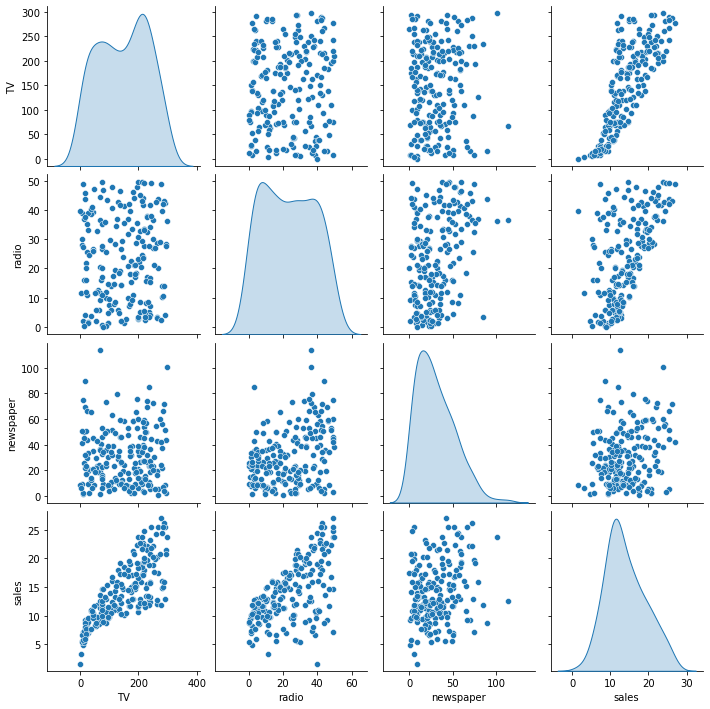

In [7]:
sns.pairplot(data_mod ,diag_kind='kde')

In [8]:
data_mod.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

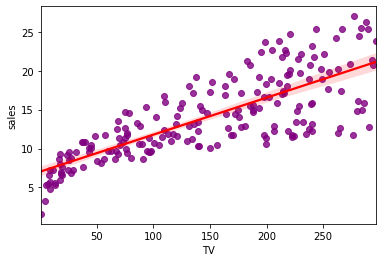

In [9]:
sns.set_style="white_grid"
sns.regplot(x="TV",y="sales",data=data_mod,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})
plt.show()

In this reg plot it is apparent that  sales is positively correlated with Tv data.Tv feature is almost close to best fit line it means that the feature Tv and sales having linear relationship

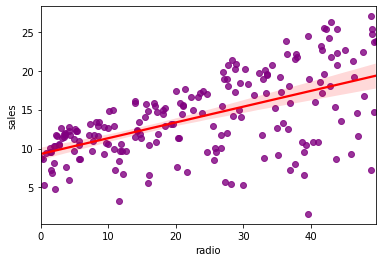

In [10]:

sns.regplot(x="radio",y="sales",data=data_mod,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})
plt.show()

In this reg plot it is apparent that  sales is positively correlated with radio data.radio feature is not as close as tv feature but it has linear relationship

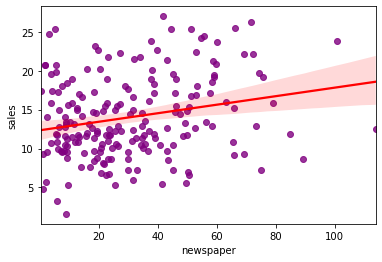

In [11]:
sns.regplot(x="newspaper",y="sales",data=data_mod,scatter_kws = {'color': 'purple'}, line_kws = {'color': 'r'})
plt.show()

In this reg plot it is apparent that  sales is positively correlated with newspaper data.In the above representation more plots are scattered from best fit line,it means that the newspaper variable  has partial linear relationship with sales variable

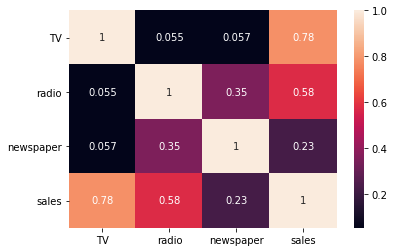

In [12]:
sns.heatmap(data_mod.corr(),annot=True)
plt.show()

Tv feature is highly correlated to sales.tv,radio and newspaper are positively correlated with sales.To increase the sales they have to prefer to tv first and then radio and then newspaper.Tv has the majority audience. 

__Handling outliers

<AxesSubplot:xlabel='TV'>

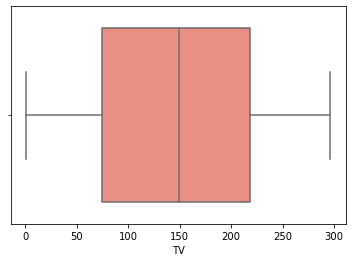

In [13]:
sns.boxplot(df['TV'],color="salmon")

<AxesSubplot:xlabel='radio'>

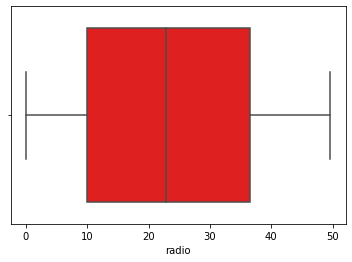

In [14]:
sns.boxplot(df['radio'],color="red")

<AxesSubplot:xlabel='newspaper'>

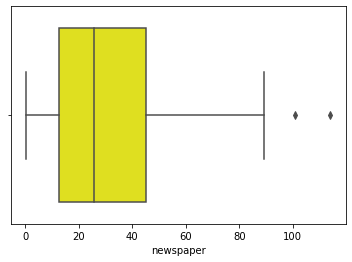

In [15]:
sns.boxplot(df['newspaper'],color="yellow")

The features tv and radio has no outliers but the feature newspaper has outlier

Identifing and removing outliers using zscore

In [16]:
z = np.abs(zscore(data_mod['newspaper']))
print(np.where(z > 3))

(array([ 16, 101], dtype=int64),)


In [17]:
upper_limit = df['newspaper'].mean() + 3*df['newspaper'].std()
lower_limit = df['newspaper'].mean() - 3*df['newspaper'].std()

In [18]:
data=data_mod

In [19]:
data['newspaper'] = np.where(
    df['newspaper']>upper_limit,
    upper_limit,
    np.where(
        df['newspaper']<lower_limit,
        lower_limit,
        df['newspaper']
    )
)

<AxesSubplot:xlabel='newspaper'>

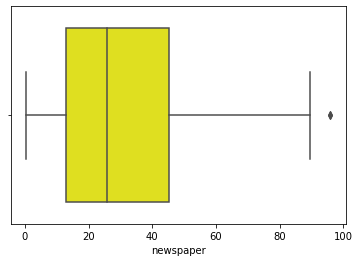

In [20]:
sns.boxplot(data['newspaper'],color="yellow")

__Handling skewness

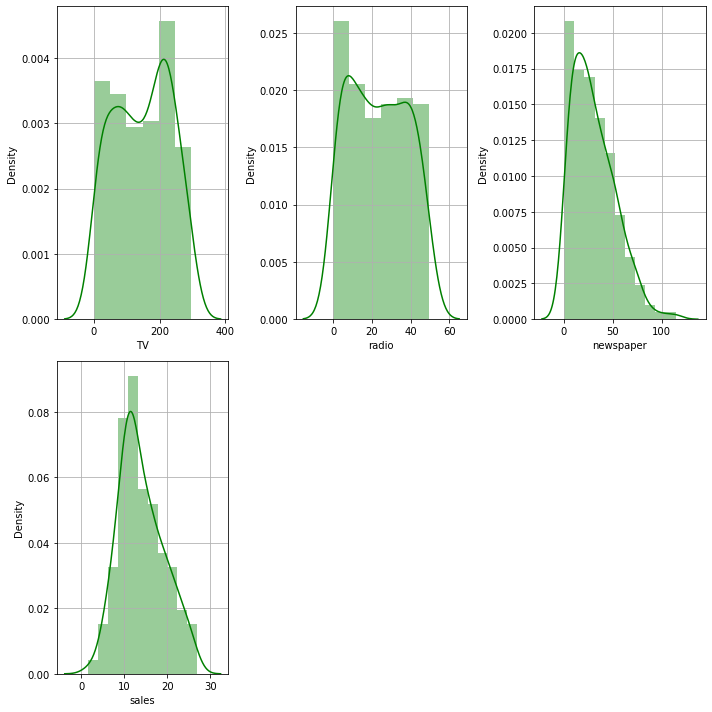

In [21]:
plt.figure(figsize=(10,10))
for i,col in enumerate(list(data_mod.columns.values)):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col],color='green',kde=True)
    plt.grid()
    ##plt.legend(loc='upper right')
plt.tight_layout()

The feature newspaper has postive skewness

In [22]:
for col in enumerate(list(data_mod.columns.values)):
    print(col[1],"=",data_mod[col[1]].skew())

TV = -0.06985336213274573
radio = 0.09417463149664404
newspaper = 0.7686290788089932
sales = 0.4075714250767127


here the skewness value is greater than 0.5 so the feature newspaper has skewness

In [23]:
data_clean=data

In [24]:
data_clean['newspaper']=np.cbrt(data_clean['newspaper'])

In [25]:
f= (data_clean['newspaper']).skew()
print(f)

-0.2941928641324719


skewness  in newspaper feature is removed

<AxesSubplot:xlabel='newspaper'>

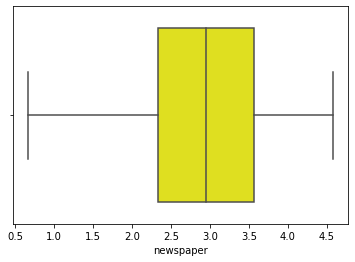

In [26]:
sns.boxplot(data_clean['newspaper'],color="yellow")

outliers and skewness are completly removed from newspaper feature

In [27]:

!pip install xgboost


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [29]:
x=data_clean.drop('sales',axis=1)
y=df['sales']

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [31]:
models=[LinearRegression(),Ridge(),Lasso(),
        xgb.XGBRegressor(objective="reg:squarederror")]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [32]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)


LinearRegression()
Mean absolute error 1.1109257043160428
Mean squared error 2.287684226153337
Root Mean squared error 1.512509248286878
R2 Score 0.9148749390690379
---------------------------------------------------------------------------------------------------------
Ridge()
Mean absolute error 1.1108974702985912
Mean squared error 2.287532482749702
Root Mean squared error 1.512459084653103
R2 Score 0.9148805854630344
---------------------------------------------------------------------------------------------------------
Lasso()
Mean absolute error 1.117072745030415
Mean squared error 2.3094494633130176
Root Mean squared error 1.5196872912915398
R2 Score 0.9140650514463436
---------------------------------------------------------------------------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
  

In [33]:
from sklearn.model_selection import cross_val_score
rid=Ridge()
scores=cross_val_score(rid,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.90792558, 0.76338533, 0.89094457, 0.92504782, 0.86716895])

In [34]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.90789549, 0.7633699 , 0.89094176, 0.92496823, 0.86717243])

In [35]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.90896287, 0.76673815, 0.89179003, 0.92770102, 0.86467549])

In [36]:
from sklearn.model_selection import cross_val_score
x=xgb.XGBRegressor()
scores=cross_val_score(x,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.96304643, 0.93595958, 0.9679913 , 0.9677279 , 0.96832716])

To Avoid overfitting,bias I have found the difference between accuarcy of predicted modelfor known data and accuracy of predicted model for unknown data(cross validation score).XGBregressor has very less difference(0.00873598821).so the best model is xgb regressor

___hyper tuning is used to choose a set of optimal hyperparameters for a learning algorithm

In [42]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(xgb.XGBRegressor(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='r2')
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 5}


In [43]:
x=data_clean.drop('sales',axis=1)
y=df['sales']

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
model=xgb.XGBRegressor(base_score=0.5,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=500,reg_alpha=0,reg_lambda=5)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)
     

Accuracy 0.9850463074866288
Mean absolute error 0.5236495321447201
Mean squared error 0.40187138912394954
Root Mean squared error 0.6339332686678856
r2 score 0.9850463074866288


___Before hyper tuning:

Mean absolute error 0.6156016075249876

Mean squared error 0.6164139379013283

Root Mean squared error 0.7851203333893017

__R2 Score 0.9770631482165809

___After hyper tuning

Accuracy 0.9850463074866288

Mean absolute error 0.5236495321447201

Mean squared error 0.40187138912394954

Root Mean squared error 0.6339332686678856

__r2 score 0.9850463074866288

__save the model

In [48]:
from joblib import dump
dump(model, 'model_ad.joblib')

['model_ad.joblib']

In [49]:
from joblib import load
loaded = load('model_ad.joblib')